## Calculate dielectric tensor (method 1)
No projections are performed.  
Dielectric tensor (and jdos) calculated in similar way as epsilon.x.  
The dipole matrix elements are computed following "PWSCF's epsilon.x user's manual" Eq. (14).  
Band energies are read from QE output.  
For insulators, use smearing=None only. For metals, use smearing='gauss' or 'm-p'.   
!! Important: full k-point grid is required, i.e. nosym and noinv = .true.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
from PAOFLOW import PAOFLOW

## Si

In [2]:
paoflow = PAOFLOW(savedir='./Si/silicon_k12_nosym.save', model=None, outputdir='./Si/output_k12_nosym/', 
                          smearing=None, verbose=True)


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Insulator: True
Magnetic: False
Number of kpoints: 1728
Number of electrons: 8.000000
Number of bands: 18
SciPy 

In [3]:
paoflow.dielectric_tensor(delta=0.1,emax=8.,ne=800,d_tensor=[[2,2],[0,1]],from_H=False)

Calculate dipole matrix element from wavefunction
No smearing, fixed occupation
Component zz , plasmon frequency =  14.882138574668867 eV
Integration over JDOS =  0.03246801370791663
Calculate dipole matrix element from wavefunction
No smearing, fixed occupation
Component xy , plasmon frequency =  10.523261103489377 eV
Integration over JDOS =  0.03246801370791663
Dielectric Tensor in:                      16.580 sec


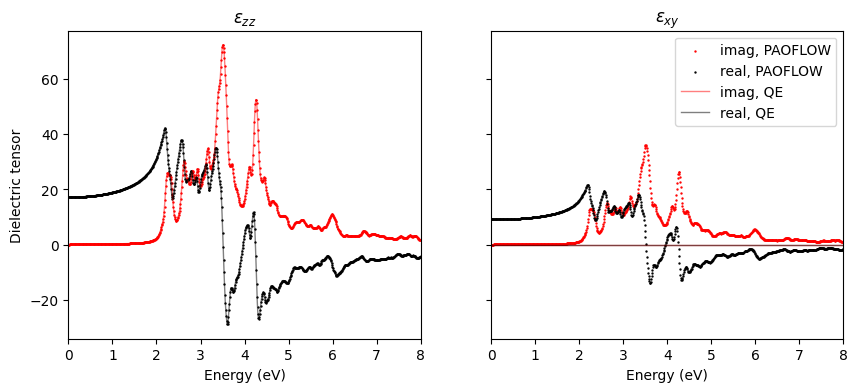

In [29]:
epsi_zz = np.loadtxt('./Si/output_k12_nosym/epsi_zz_0.dat')
epsr_zz = np.loadtxt('./Si/output_k12_nosym/epsr_zz_0.dat')
epsqe_zz = np.loadtxt('./Si/qe_output/epszz.dat')
epsi_xy = np.loadtxt('./Si/output_k12_nosym/epsi_xy_0.dat')
epsr_xy = np.loadtxt('./Si/output_k12_nosym/epsr_xy_0.dat')
epsqe_xy = np.loadtxt('./Si/qe_output/epsxy.dat')

fig, ax = plt.subplots(1,2,figsize=(10,4),sharey=True)

ax[0].scatter(epsi_zz[:,0],epsi_zz[:,1],color='red',s=0.5,label="imag, PAOFLOW")
ax[0].scatter(epsr_zz[:,0],epsr_zz[:,1],color='black',s=0.5,label="real, PAOFLOW")
ax[0].plot(epsqe_zz[:,0],epsqe_zz[:,2],color='red',alpha=0.5,label="imag, QE",linewidth=1)
ax[0].plot(epsqe_zz[:,0],epsqe_zz[:,1],color='black',alpha=0.5,label="real, QE",linewidth=1)
ax[0].set_xlim([0,8])
ax[0].set_title("$\epsilon_{zz}$")
ax[0].set_xlabel("Energy (eV)")
ax[0].set_ylabel("Dielectric tensor")

ax[1].scatter(epsi_xy[:,0],epsi_xy[:,1],color='red',s=0.5,label="imag, PAOFLOW")
ax[1].scatter(epsr_xy[:,0],epsr_xy[:,1],color='black',s=0.5,label="real, PAOFLOW")
ax[1].plot(epsqe_xy[:,0],epsqe_xy[:,2],color='red',alpha=0.5,label="imag, QE",linewidth=1)
ax[1].plot(epsqe_xy[:,0],epsqe_xy[:,1],color='black',alpha=0.5,label="real, QE",linewidth=1)
ax[1].set_xlim([0,8])
ax[1].set_title("$\epsilon_{xy}$")
ax[1].set_xlabel("Energy (eV)")
ax[1].legend()
plt.show()

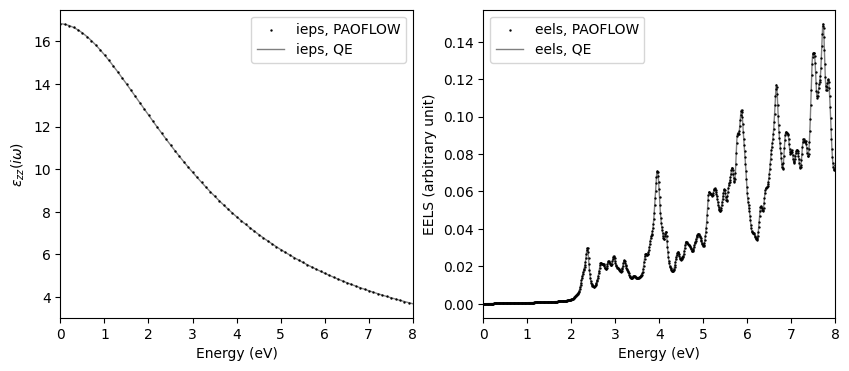

In [32]:
ieps_zz = np.loadtxt('./Si/output_k12_nosym/ieps_zz_0.dat')
iepsqe_zz = np.loadtxt('./Si/qe_output/ieps_silicon.dat')
eels_zz = np.loadtxt('./Si/output_k12_nosym/eels_zz_0.dat')
eelsqe_zz = np.loadtxt('./Si/qe_output/eels_silicon.dat')

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(ieps_zz[::10,0],ieps_zz[::10,1],color='k',s=0.5,label="ieps, PAOFLOW")
ax[0].plot(iepsqe_zz[:,0],iepsqe_zz[:,3],color='k',alpha=0.5,label="ieps, QE",linewidth=1)
ax[0].set_xlim([0,8])
ax[0].set_xlabel("Energy (eV)")
ax[0].set_ylabel("$\epsilon_{zz}(i\omega)$")
ax[0].legend()

ax[1].scatter(eels_zz[:,0],eels_zz[:,1],color='k',s=0.5,label="eels, PAOFLOW")
ax[1].plot(eelsqe_zz[:,0],eelsqe_zz[:,3],color='k',alpha=0.5,label="eels, QE",linewidth=1)
ax[1].set_xlim([0,8])
ax[1].set_xlabel("Energy (eV)")
ax[1].set_ylabel("EELS (arbitrary unit)")
ax[1].legend()
plt.show()

## Al

In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
from PAOFLOW import PAOFLOW

In [6]:
paoflow001 = PAOFLOW(savedir='./Al/al_k12_nosym_001.save', model=None, outputdir='./Al/output_k12_nosym_001/', 
                          smearing='gauss', verbose=True)
paoflow002 = PAOFLOW(savedir='./Al/al_k12_nosym_002.save', model=None, outputdir='./Al/output_k12_nosym_002/', 
                          smearing='gauss', verbose=True)



#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

Monkhorst and Pack grid: 12 12 12 0 0 0
Insulator: False
Magnetic: False
Number of kpoints: 1728
Number of electrons: 3.000000
Number of bands: 20
SciPy

In [7]:
paoflow001.dielectric_tensor(delta=0.1,intrasmear=0.05,
                          emax=5.,ne=501,d_tensor=[[0,0]],from_H=False)
paoflow002.dielectric_tensor(delta=0.1,intrasmear=0.05,
                          emax=5.,ne=501,d_tensor=[[0,0]],from_H=False)

Calculate dipole matrix element from wavefunction
Using fixed smearing = 0.136 eV
Component xx , plasmon frequency =  17.502002827719245 eV
Integration over JDOS =  0.004536613722040527
Dielectric Tensor in:                       7.249 sec
Calculate dipole matrix element from wavefunction
Using fixed smearing = 0.272 eV
Component xx , plasmon frequency =  17.331835428950416 eV
Integration over JDOS =  0.004590293864994893
Dielectric Tensor in:                      14.494 sec


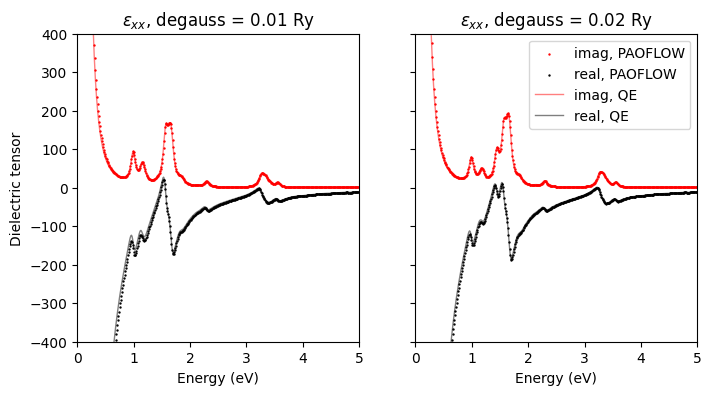

In [8]:
epsi001 = np.loadtxt('./Al/output_k12_nosym_001/epsi_xx_0.dat')
epsr001 = np.loadtxt('./Al/output_k12_nosym_001/epsr_xx_0.dat')
epsiqe001 = np.loadtxt('./Al/qe_output_k12_001/epsi_al.dat',skiprows=30)
epsrqe001 = np.loadtxt('./Al/qe_output_k12_001/epsr_al.dat',skiprows=50)
epsi002 = np.loadtxt('./Al/output_k12_nosym_002/epsi_xx_0.dat')
epsr002 = np.loadtxt('./Al/output_k12_nosym_002/epsr_xx_0.dat')
epsiqe002 = np.loadtxt('./Al/qe_output_k12_002/epsi_al.dat',skiprows=30)
epsrqe002 = np.loadtxt('./Al/qe_output_k12_002/epsr_al.dat',skiprows=50)

fig, ax = plt.subplots(1,2,figsize=(8,4),sharey=True)

ax[0].scatter(epsi001[:,0],epsi001[:,1],color='red',s=0.5,label="imag, PAOFLOW")
ax[0].scatter(epsr001[:,0],epsr001[:,1],color='black',s=0.5,label="real, PAOFLOW")
ax[0].plot(epsiqe001[:,0],epsiqe001[:,1],color='red',alpha=0.5,label="imag, QE",linewidth=1)
ax[0].plot(epsrqe001[:,0],epsrqe001[:,1],color='black',alpha=0.5,label="real, QE",linewidth=1)
ax[0].set_xlim([0,5])
ax[0].set_ylim([-400,400])
ax[0].set_title("$\epsilon_{xx}$, degauss = 0.01 Ry")
ax[0].set_xlabel("Energy (eV)")
ax[0].set_ylabel("Dielectric tensor")

ax[1].scatter(epsi002[:,0],epsi002[:,1],color='red',s=0.5,label="imag, PAOFLOW")
ax[1].scatter(epsr002[:,0],epsr002[:,1],color='black',s=0.5,label="real, PAOFLOW")
ax[1].plot(epsiqe002[:,0],epsiqe002[:,1],color='red',alpha=0.5,label="imag, QE",linewidth=1)
ax[1].plot(epsrqe002[:,0],epsrqe002[:,1],color='black',alpha=0.5,label="real, QE",linewidth=1)
ax[1].set_xlim([0,5])
ax[1].set_title("$\epsilon_{xx}$, degauss = 0.02 Ry")
ax[1].set_xlabel("Energy (eV)")
ax[1].legend()
plt.show()